In [1]:
from __future__ import print_function
from fenics import * 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 2.0          # final time step
num_steps = 10   # number of time steps
dt = T/num_steps # time step size
alpha = 3
beta = 1.2

In [3]:
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(ny, ny)
V = FunctionSpace(mesh, 'Lagrange', 1)

In [4]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [5]:
# Define initial value
u_n = interpolate(u_D, V)
# u_n= project(u_D, V)

In [6]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

# F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
# a, L = lhs(F), rhs(F)

a = u * v * dx + dt * dot(grad(u), grad(v)) * dx
L = (u_n + dt * f) * v*dx


t = 0.20: error = 3.11e-15
t = 0.40: error = 2.22e-15
t = 0.60: error = 2.66e-15
t = 0.80: error = 4e-15
t = 1.00: error = 4e-15
t = 1.20: error = 4e-15
t = 1.40: error = 4.44e-15
t = 1.60: error = 4.88e-15
t = 1.80: error = 3.55e-15
t = 2.00: error = 4.44e-15


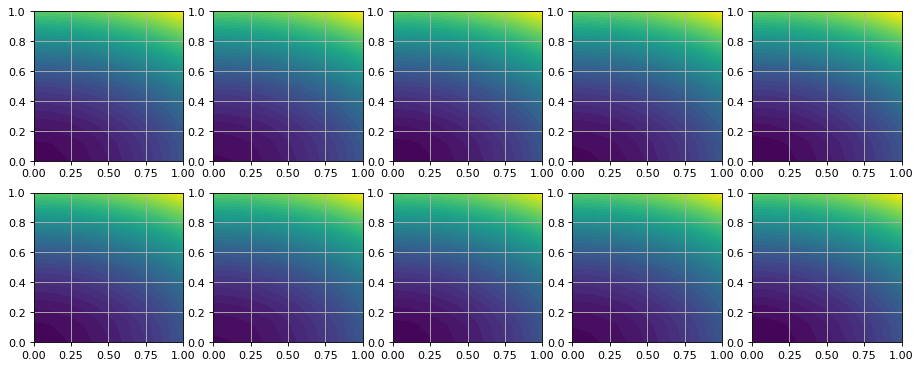

In [13]:
# Time-stepping
u = Function(V)
t = 0
u_D.t = 0
u_n.assign(u_D)
plt.figure(figsize=(14,5.5), dpi=80)

for n in range(num_steps):
    # Update current time
    t += dt
    u_D.t = t
    
    # Compute solution
    solve(a == L, u, bc)
    
    # Plot solution
    plt.subplot(2,5,n+1)
    plot(u); plt.grid()
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.max(np.abs(u_e.compute_vertex_values()- u.compute_vertex_values()))
    print('t = %.2f: error = %.3g' %(t, error))
    
    # Update previous solution
    u_n.assign(u)